# SNLP Assignment 4

Name 1: Daniya Niazi<br>
Student id 1: 7062343<br>
Email 1: dani00003@stud.uni-saarland.de <br>

Name 2: Zoha Zehra<br/>
Student id 2: 7061946<br/>
Email 2: zoze00001@stud.uni-saarland.de<br/>

Name 3: Aleksey Morshnev<br/>
Student id 3: 7042691<br/>
Email 3: almo00008@stud.uni-saarland.de<br/>

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook and the respective Python files for any additional exercises necessary. There is no need to submit the data files should they exist. <br>

Upload the zipped folder on CMS. Please follow the naming convention of **Name1_studentID1_Name2_studentID2_Name3_studentID3.zip**. Only one member of the group should make the submisssion.

---

# 1. Code (Theory) (1 Point)

**1.1 (0.25 points)** Look at the lecture slides of chapter 4 (p. 26 - 36) and nicely write down the formulae in the following Markdown cell for these three:
- Kraft's inequality 
- expected length per word after encoding
- optimal length of code words

**1.2 (0.25 points)** What is a prefix code and how does it relate to Kraft’s inequality?

**1.3 (0.5 points)** Show mathematically that every prefix code with fixed-length satisfies Kraft's inequality. Explain.

### Answers 1.1 - 1.3:

---
### 1.1
#### Karft's Inequality 

$$
D(p || q) = \sum_{i=1}^n p_i \log\left(\frac{p_i}{q_i}\right)
$$

#### Expected length per word after encoding
$$ 
L = \sum_{i=1}^n li * p \left(wi\right) $$
#### Optimal length of code words
$$  li =- \log_D p\left(wi\right) $$

### 1.2
##### What is a prefix code and how does it relate to Kraft’s inequality?
Prefix code is a design of such code words assignation such that no code word is a prefix of another code word also called a prefix free code. In a simple words the code of Symbol2 does not start with a code of Symbol1

###### Relation with Kraft's Inequality
Suppose we have S1--S4 (eg: A,B,C,D) sybmbols and we want to encode in D={0,1} Binary symbols (any range r1,..,rn) of code word length l1,l2,..ln then to check if unique decodeable exist for this sample, the law of kraft's equality should hold on your design code words of length l1,l2,..ln over D. If its hold then it is possible to construct a prefix code with those lengths. 

<b> Mathematically </b>
$$
\sum_{i=1}^n D^{-l_i} \leq 1
$$

In conclusion Kraft’s inequality provides a necessary and sufficient condition for the existence of a prefix code for a given set of code word lengths

### 1.3

Kraft's inequality is given by 
$$
\sum_{i=1}^n D^{-l_i} \leq 1
$$

if we have n prefix code words of same length l then kraft's inequality can be simplified as
$$
n * D^{-l} \leq 1
$$

This implies that I can have $ D^{l} $ possible code words, when all code words have the same length 
𝑙 the maximum number of distinct code words (n) is 𝐷^𝑙 as each position in the code word can take any of 𝐷 possible values thus the stated equation can be written as 

$$
n  \leq 1 * D^{l}
$$
$$
n  \leq D^{l}
$$

now multiply by $ D^{-l} $ on both sides

$$
n * D^{-l} \leq D^{l} * D^{-l}
$$

resulting in 

$$
n * D^{-l} \leq 1
$$

This shows that prefix codes with fixed code length also follow the kraft's inequality theorem. 

# 2. Code (practical exercise) (3 Points)

**2.1 (2 points)** Read up on *`Shannon–Fano coding`* on Wikipedia (https://en.wikipedia.org/wiki/Shannon-fano) and implement the algorithm that is described in the section *`Fano's code: binary splitting`*. Feel free to use the example from the lecture to check your implementation for correctness:

| word | frequency | $$C(\text{word})$$ |
| ---- | --------- | ------- |
|"the" | 0.5       | `0`     |
|"and" | 0.25      | `10`    |
|"of"  | 0.125     | `110`   |
|"he"  | 0.125     | `111`   |

**2.2 (0.5 points)** Load the text file `alice_eng.txt` and preprocess it by lowercasing, removing punctuation and tokenizing the words by whitespaces. Now take the first 500 words of that corpus and run your implementation of Shannon-Fano encoding on it. Compute and print out the average amount of bits per word.

**2.3 (0.5 points)** Explain the differences between Shannon-Fano coding and Huffman coding. Provide an example where Huffman coding is more efficient.

### 2.1:

In [15]:
def recur_encoding(symbols: dict, prefix: str = '0') -> dict:
    # Step 2 : Sort the symbols by decreasing frequency
    sorted_symbols = sorted(symbols.items(), key=lambda item: item[1], reverse=True)
    
    # Case : If only 1 symbol left
    if len(sorted_symbols) == 1:
        return {sorted_symbols[0][0]: prefix}  
    
    total_frequency = sum(freq for _, freq in sorted_symbols)
    
    cumulative_sum = 0
    split_index = None

    for i, (_, freq) in enumerate(sorted_symbols):
        cumulative_sum += freq
        if cumulative_sum >= total_frequency / 2:
            # Ensure the split index is chosen to minimize the difference in cumulative frequencies
            if cumulative_sum - (total_frequency / 2) <= (total_frequency / 2) - (cumulative_sum - freq):
                split_index = i
            else:
                split_index = i - 1
            break
    
    # Step 3 : Split the symbols into left and right part
    left_symbols = dict(sorted_symbols[:split_index + 1])
    right_symbols = dict(sorted_symbols[split_index + 1:])
    
    # Step 4 & 5 : Recursively encode left and right parts 
    left_encoding = recur_encoding(left_symbols, prefix + '0')
    right_encoding = recur_encoding(right_symbols, prefix + '1')
    
    # Combine the encodings of left and right parts
    left_encoding.update(right_encoding)
    
    return left_encoding

def get_encoding(symbols: dict, base: int = 2) -> dict:
    """ Generate a prefix encoding for each of the symbols

    Args:
    symbols - a dictionary that holds in its keys the symbols and
                their relative frequency as the value, e.g. {'a': 0.5, 'b': 0.5}
    base - an `int` that represents the base of the code. For the purpose of
            this exercise, using only base `2`, i.e. binary code, suffices.

    Returns a `dict` with symbols in its keys and the encoding as the
    values, e.g. {'a': '0', 'b': '1'}
    """
    
    # Call the recursive function to generate encoding
    return recur_encoding(symbols,'')

# Test the function
print(get_encoding({"the": 0.5, "and": 0.25, "of": 0.125, "he": 0.125}))


{'the': '0', 'and': '10', 'of': '110', 'he': '111'}


### 2.2:

In [16]:
### TODO
import string
from collections import Counter

def txt_preprocessing(filepath: str, length : int) -> list:
    with open(filepath, 'r',encoding='utf-8') as file:
        text = file.read()
    
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the words by whitespaces
    words = text.split()
    
    # Take the first 500 words
    truncated_words = words[:length]
    
    return truncated_words

def calculat_corpus_word_probabilities(word_list: list) -> dict:
    # Count the frequency of each unique word
    word_counts = Counter(word_list)
    
    # Calculate the total number of words
    total_words = len(word_list)
    
    # Calculate the probability of each word
    word_probabilities = {word: count / total_words for word, count in word_counts.items()}
    
    return word_probabilities,total_words,word_counts

filepath = 'data/alice_eng.txt'  
first_500_words = txt_preprocessing(filepath,500)
word_probabilities ,total_words,word_counts= calculat_corpus_word_probabilities(first_500_words)
# Apply the Shannon Fanon Encoding
shannon_fano_encoding = get_encoding(word_probabilities)
average_no_of_bits = sum((freq * len(shannon_fano_encoding[word])) for word, freq in word_counts.items())/total_words
print("Average No of Bits per word ",average_no_of_bits)

Average No of Bits per word  7.294


### Answer 2.3:


---
| Shannon Fano | Huffman Coding |
| ---- | --------- | 
| Follow a top down approach - Build a Coding tree from top to Bottom| Follow a top down approach - Build a Coding tree from top to Bottom |
|Does not always give the optimal output | always gives the optimal coding     | 
|It is based on recursively spliting the list based on cumulative probabilities  | It repeatedly merges the lowest two freqeuncies to build a tree | 

Consider the same given problem

In [20]:
example_dic_freq = {"the": 15, "and": 7, "of": 6, "he":6 , "snlp":5}
example_probabilities = {"the": 0.385, "and": 0.179, "of": 0.154, "he":0.154 , "snlp":0.128}
example_shannon_fano_encoding = get_encoding(example_probabilities)
example_avg_shannon_bits = sum((freq * len(example_shannon_fano_encoding[word])) for word, freq in example_dic_freq.items())/39

Now If we create a Huffman tree it'll look like this ( source wikipedia )

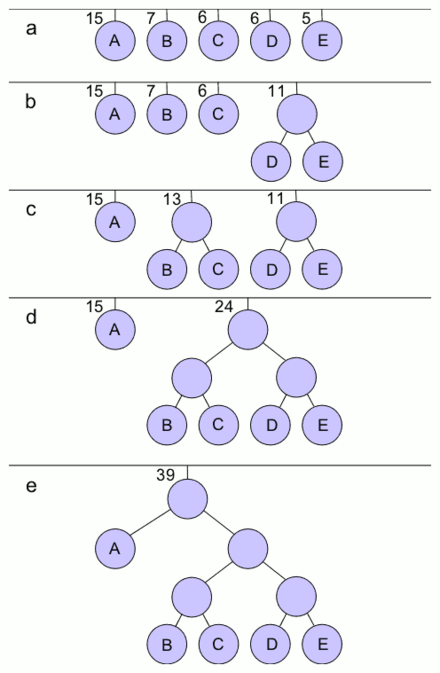



In [21]:
example_huffman_encoding = {"the": '0', "and": "100", "of": "101", "he":"110" , "snlp":"111"}
example_avg_huffman_bits = sum((freq * len(example_huffman_encoding[word])) for word, freq in example_dic_freq.items())/39

print("Shanon Average No of Bits " ,example_avg_shannon_bits) #same as wikipedia
print("Huffman Average No of Bits " ,example_avg_huffman_bits) #same as wikipedia

Shanon Average No of Bits  2.282051282051282
Huffman Average No of Bits  2.230769230769231


# 3. Perplexity Calculations (3 Points)

You are given a vocabulary of three words $w_1, w_2, w_3$ and a language model that assigns probabilities to these words:<br>
| word | $$p(w_i)$$ |
| ---- | --------- |
|$$w_1$$ | $$0.2$$       |
|$$w2$$ | $$0.5$$      |
|$$w3$$  | $$0.3$$     |

**3.1 (0.25 points)** Calculate the entropy.

**3.2 (0.25 points)** Calculate the perplexity.

**3.3 (1 point)** Write down the Lagrangian function that minimizes the entropy under the constraint that the probabilities sum up to 1.

$$L(p_1, p_2, p_3, λ) = $$

**3.4 (1 point)** Write down the four partial derivatives and set them to zero. Calculate the result for the optimized probabilities.

**3.5 (0.5 points)** Now compute the perplexity for the optimized probabilities. Explain the result.

### Answers 3.1 - 3.5:


---

### 3.1

$$
H(V) = -Σ p(x) log₂ p(x)
$$

$$
p(w₁) = 0.2 
p(w₂) = 0.5
p(w₃) = 0.3
$$

$$
H(V) = -[0.2 log₂ 0.2 + 0.5 log₂ 0.5 + 0.3 log₂ 0.3]
$$

$$
H(V) = -[0.2 × (-2.3219) + 0.5 × (-1) + 0.3 × (-1.7369)]
$$

$$
H(V) = -(-0.46439 - 0.5 - 0.52107)
$$

$$
H(V) = 1.4855
$$

### 3.2

$$
PP = 2^H
$$

$$
PP=2.800 bit
$$

### 3.3

$$
H(p_1, p_2, p_3) = −(p_1 log_2 p_1 + p_2 log_2 p_2 + p_3 log_2 p_3)
$$

$$
p_1 + p_2 + p_3 = 1
$$

##### The lagrangian function would be by introducing 𝜆

$$
L(p_1, p_2, p_3, 𝜆) = −(p_1 log_2 p_1 + p_2 log_2 p_2 + p_3 log_2 p_3) + 𝜆(p_1 + p_2 + p_3 - 1)
$$

### 3.4

Partial derivative with respect to p1 and setting it to 0:

$$
\frac{\partial L}{\partial p_1} = - log_2  p_1 - 1 + 𝜆 = 0
$$

Partial derivative with respect to p2 and setting it to 0:

$$
\frac{\partial L}{\partial p_2} = - log_2  p_2 - 1 + 𝜆 = 0
$$

Partial derivative with respect to p3 and setting it to 0:

$$
\frac{\partial L}{\partial p_3} = - log_2  p_3 - 1 + 𝜆 = 0
$$

Partial derivative with respect to 𝜆 and setting it to 0:

$$
\frac{\partial L}{\partial 𝜆} = p_1 + p_2 + p_3 - 1 = 0
$$

$$
log_2  p_1 = log_2  p_2 = log_2  p_3 = 𝜆 - 1
$$

Taking the exponential of both sides, we get:

$$
p₁ = p₂ = p₃ = 2^{λ - 1}
$$

Substituting this into the fourth equation, we have:

$$
3 * 2^{λ - 1} = 1
$$

$$
λ = 1 - log₂ 3
$$

Substituting this value of λ back into the equation for p₁, p₂, and p₃, we get:

$$
p₁ = p₂ = p₃ = 2^{-log₂ 3} = 1/3
$$

### 3.5

$$
H(X) = -Σ p(x) log₂ p(x)
$$

$$
H(X) = -[(1/3) log₂ (1/3) + (1/3) log₂ (1/3) + (1/3) log₂ (1/3)]
$$

$$
H(X) = log₂ 3
$$

$$
PP = 2^{H(X)}
$$

$$
PP = 2^{log₂ 3}
$$

$$
PP = 3
$$

The perplexity of 3 for the optimized probabilities p₁ = p₂ = p₃ = 1/3 indicates the highest level of randomness in the model's predictions. When all probabilities are equal, the model has no preference for any particular word, leading to maximum entropy and a perplexity equal to the vocabulary size.

# 4. OOVs (3 points)

**4.1 (0.25 points)** What are out-of-vocabulary words (OOVs)?

**4.2 (0.25 points)** How does perplexity behave with words that are less frequent?

**4.3 (0.25 points)** Show mathematically what would happen to the perplexity if a symbol in the test set is an OOV. In this case, assume a probability of $0^+$.

**4.4 (0.25 points)** Load the Penn Treebank in NLTK (based on the WSJ corpus), preprocess it by lowercasing and removing punctuation, and then perform a 70:30 train:test split.

The go-to solution for modelling OOVs in the N-gram setting is to introduce a new `<unk>` token in the vocabulary for all unknown words. The `<unk>` token replaces all OOVs and is then modeled like a normal word. 

**4.5 (0.5 points)** Your task is to complete the function to create a vocabulary with the top_n most frequent words in the train set.

**4.6 (0.5 points)** Complete the function that restricts a corpus into the given vocabulary, i.e. all OOVs will be replaced with `<unk>`.

**4.7 (0.5 points)** Plot the OOV-rates (see chapter 5 p. 5) for the train and test set with increasing size of the vocabulary (use a log-log scale). What do you observe?

**4.8 (0.5 points)** Plot the perplexity for the train and test set with increasing size of the vocabulary. What do you observe?

### Answers 4.1 - 4.3:



### 4.1
Answer: Out-of-vocabulary words (OOVs) are words that are not present in the training vocabulary and hence they are considered as unseen words in the testing corpus.

### 4.2
The perplexity of model in increased due to the presence of less frequent words because it gets difficult for model to predict accurately. The model assigns infrequent words lower probabilities and when these words appear in the test corpus, the model's predictions are less confident which result in higher perplexity.

### 4.3
$$
PP = 2^H
$$

where H is the entropy of the model over the test set.

$$
H = - \frac{1}{N}  \sum_{i=1}^n log_2 P(w_i)
$$

where,

N = length of the test sequence

P(w_i) = probability assigned by the model to the i-th symbol in the test sequence.

If OOV symbol w_i in the test set, then p(w_i) = 0

$$
log₂ P(w_i) = log₂ 0 = -∞
$$

$$
PP = 2^{- \frac{1}{N}  \sum_{i=1}^n log_2 P(w_i) + log_2 0}
$$

$$
PP = 2^{- \frac{1}{N}  \sum_{i=1}^n log_2 P(w_i) - ∞}
$$

$$
PP = ∞
$$

The perplexity becomes infinity.

### Your Code for 4.4 - 4.6:

In [1]:
from collections import Counter
import nltk
from nltk.corpus import treebank
import string

nltk.download('treebank')
nltk.download('punkt')

### TODO

def load_and_preprocess_data() -> list[list[str]]:
    ''' Function that loads the WSJ dataset, removes punctuation and lowercases the tokens
    Output: the preprocessed corpus - list[list[str]]'''
    sentences = treebank.sents()

    preprocessed_corpus = []
    for sentence  in sentences:
        preprocessed_sentence = [word.lower() for word in sentence if word.isalpha()]
        preprocessed_corpus.append(preprocessed_sentence)
        
    return preprocessed_corpus

def train_test_split(corpus: list[list[str]]) -> (list[list[str]], list[list[str]]):
    '''Splits the corpus using a 70:30 ratio. Do not randomize anything here. use the original order
    Input: corpus - list[list[str]]
    Output: tuple of train and test set - list[list[str]], list[list[str]]'''
    split_index = int(len(corpus) * 0.7)
    
    train_set = corpus[:split_index]
    test_set = corpus[split_index:]

    return train_set, test_set

def make_vocab(corpus: list[list[str]], top_n: int) -> set:
    '''Make the top_n frequent vocabulary from a corpus
    Input: corpus - list[list[str]]
         top_n  - int
    Output: the vocabulary - set of words'''
    all_words = [word for sentence in corpus for word in sentence]

    word_freq = Counter(all_words)
    top_words = [word for word, freq in word_freq.most_common(top_n)]

    return set(top_words)
    
    
def restrict_vocab(corpus: list[list[str]], vocab: set) -> list[list[str]]:
    '''Make the corpus fit inside the vocabulary using <unk>
    Input: corpus - list[list[str]]
         vocab  - set of words
    Output: The corpus restricted by the vocabulary - list[list[str]]'''
    restricted_corpus = []

    for sentence in corpus:
        restricted_sentence = [word if word in vocab else '<unk>' for word in sentence]
        restricted_corpus.append(restricted_sentence)

    return restricted_corpus
    

[nltk_data] Downloading package treebank to /home/reni/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package punkt to /home/reni/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Your Code for 4.7 - 4.8:

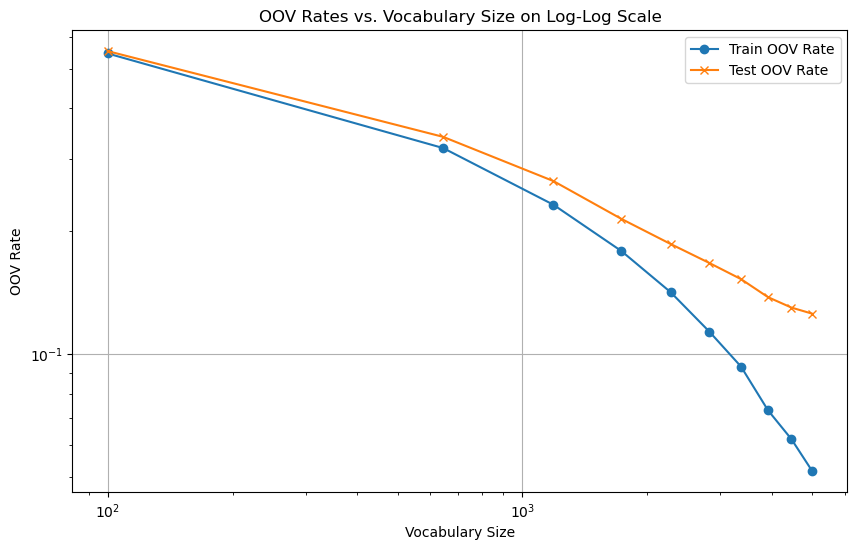

In [2]:
import numpy as np
import matplotlib.pyplot as plt

corpus = load_and_preprocess_data()

train_set, test_set = train_test_split(corpus)

def compute_oov_rate(corpus: list[list[str]], vocab: set) -> float:
    total_tokens = 0
    oov_tokens = 0
    for sentence in corpus:
        for word in sentence:
            total_tokens += 1
            if word not in vocab:
                oov_tokens += 1
    return oov_tokens / total_tokens

train_oov_rates = []
test_oov_rates = []
vocab_sizes = np.linspace(100, 5000, 10, dtype=int)

for top_n in vocab_sizes:
    vocab = make_vocab(train_set, top_n)

    train_oov_rate = compute_oov_rate(train_set, vocab)
    test_oov_rate = compute_oov_rate(test_set, vocab)
    
    train_oov_rates.append(train_oov_rate)
    test_oov_rates.append(test_oov_rate)

plt.figure(figsize=(10, 6))
plt.plot(vocab_sizes, train_oov_rates, label='Train OOV Rate', marker='o')
plt.plot(vocab_sizes, test_oov_rates, label='Test OOV Rate', marker='x')
plt.xlabel('Vocabulary Size')
plt.ylabel('OOV Rate')
plt.xscale('log')
plt.yscale('log')
plt.title('OOV Rates vs. Vocabulary Size on Log-Log Scale')
plt.legend()
plt.grid(True)
plt.show()

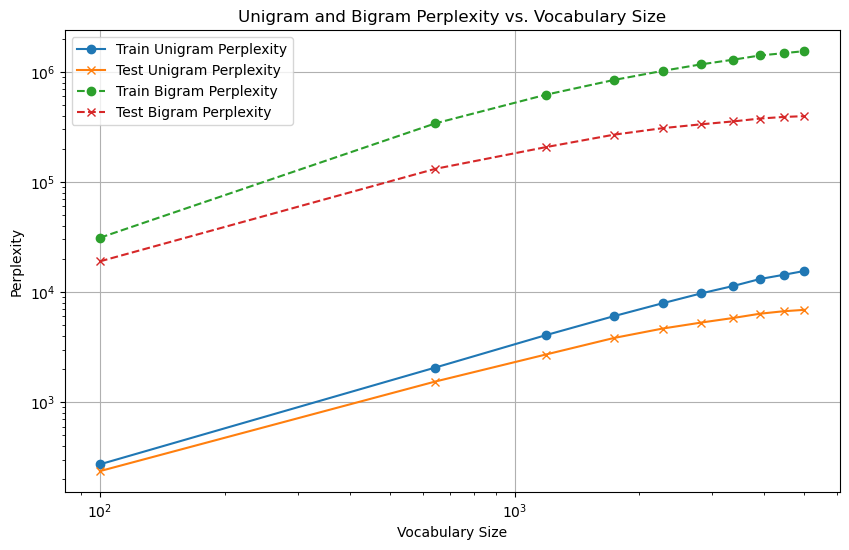

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import math
from collections import Counter

def compute_probabilities(corpus: list[list[str]], vocab: set, model_type='unigram') -> dict:
    if model_type == 'unigram':
        total_count = 0
        word_freq = Counter(word for sentence in corpus for word in sentence if word in vocab)
        total_count = sum(word_freq.values())
        probabilities = {word: count / total_count for word, count in word_freq.items()}
        return probabilities
    elif model_type == 'bigram':
        bigram_freq = Counter()
        total_bigrams = 0
        for sentence in corpus:
            sentence = ['<s>'] + [word for word in sentence if word in vocab] + ['</s>']
            bigrams = zip(sentence[:-1], sentence[1:])
            for bigram in bigrams:
                if bigram[0] in vocab and bigram[1] in vocab:
                    bigram_freq[bigram] += 1
                    total_bigrams += 1
        probabilities = {bigram: count / total_bigrams for bigram, count in bigram_freq.items()}
        return probabilities

def compute_perplexity(corpus: list[list[str]], vocab: set, model_type='unigram') -> float:
    probabilities = compute_probabilities(corpus, vocab, model_type)
    log_prob_sum = 0
    total_count = 0

    if model_type == 'unigram':
        for sentence in corpus:
            for word in sentence:
                if word in probabilities:
                    log_prob_sum += math.log2(probabilities[word])
                    total_count += 1
    elif model_type == 'bigram':
        for sentence in corpus:
            sentence = ['<s>'] + [word for word in sentence if word in vocab] + ['</s>']
            bigrams = zip(sentence[:-1], sentence[1:])
            for bigram in bigrams:
                if bigram in probabilities:
                    log_prob_sum += math.log2(probabilities[bigram])
                    total_count += 1

    if total_count == 0:
        return float('inf')

    return math.exp(-log_prob_sum / total_count)

# Run perplexity calculations for both unigram and bigram models
vocab_sizes = np.linspace(100, 5000, 10, dtype=int)
train_unigram_perplexities = []
test_unigram_perplexities = []
train_bigram_perplexities = []
test_bigram_perplexities = []

for top_n in vocab_sizes:
    vocab = make_vocab(train_set, top_n)
    restricted_train_set = restrict_vocab(train_set, vocab)
    restricted_test_set = restrict_vocab(test_set, vocab)

    # Unigram perplexity
    train_unigram_perplexity = compute_perplexity(restricted_train_set, vocab, 'unigram')
    test_unigram_perplexity = compute_perplexity(restricted_test_set, vocab, 'unigram')
    train_unigram_perplexities.append(train_unigram_perplexity)
    test_unigram_perplexities.append(test_unigram_perplexity)

    # Bigram perplexity
    train_bigram_perplexity = compute_perplexity(restricted_train_set, vocab, 'bigram')
    test_bigram_perplexity = compute_perplexity(restricted_test_set, vocab, 'bigram')
    train_bigram_perplexities.append(train_bigram_perplexity)
    test_bigram_perplexities.append(test_bigram_perplexity)

plt.figure(figsize=(10, 6))
plt.plot(vocab_sizes, train_unigram_perplexities, label='Train Unigram Perplexity', marker='o')
plt.plot(vocab_sizes, test_unigram_perplexities, label='Test Unigram Perplexity', marker='x')
plt.plot(vocab_sizes, train_bigram_perplexities, label='Train Bigram Perplexity', marker='o', linestyle='--')
plt.plot(vocab_sizes, test_bigram_perplexities, label='Test Bigram Perplexity', marker='x', linestyle='--')
plt.xlabel('Vocabulary Size')
plt.ylabel('Perplexity')
plt.xscale('log')
plt.yscale('log')
plt.title('Unigram and Bigram Perplexity vs. Vocabulary Size')
plt.legend()
plt.grid(True)
plt.show()


### Answers 4.7 - 4.8:

My observation is that as vocabulary size grows, the oov rate decreases. However, the oov rate on test set decreases much slower than on train set. The plot shows that the relation is a power law. Explanation: as more words are included in the vocabulary, it is natural that more words are going to be both in the train and test sets. Thus, fewer words will be considered out-of-vocabulary. The slower decrease in test set of oov rate is because the vocabulary is build based on the frequency of words in the training set. And hence, it might not be as effective at covering unique words in the test set.

Regarding the perplexity vs vocab size plot - my observation is that the perplexity increases as vocabulary size grows. This is because the uncertainty in predicting (the surprise of seeing) - as perplexity defined increases as the distribution of word probabilities become more spread out. Typically, the perplexity should decrease as vocabulary size increases. Most probably there are some issues either with dataset or with the way perplexity calculated that made it increase instead of decrease.

I also made it for both unigram and bigram models to observe difference in perplexity. It seems like the rate of change is same, however the bigram's perplexity starts higher. This is easily explained by definition of bigram model -- since $P(w_i) > P(w_i | w_{i-1})$

---

# 5. Bonus: Cracking Caesar Cipher (3 Points)

**5.1 (0.5 point)** Load the files `alice_eng.txt`, `alice_fra.txt` and `alice_ger.txt`. Preprocess them by lowercasing and removing punctuation. Now replace every special language-specific character that is not a letter of the Latin alphabet with the special token '?', but keep the whitespaces.

**5.2 (0.5 point)** Perform a frequency analysis of the remaining characters and sort them in descending order. Plot a histogram for each language.

**5.3 (2 point)** You are given a text that was encrypted using the Caesar cipher (https://en.wikipedia.org/wiki/Caesar_cipher) with an unknown key. The original language is either English, French or German. Analyze the letter frequency of this text and then compute the Kullback-Leibler divergence against the three languages to find out which language it is.

"ul tyrdgzxefe uzk cr tyvezccv tfddv jz rcztv rmrzk gric? kflk yrlkvk le dfdvek rgi?j cr tyvezccv rmrzk uzjgrilrcztv tfekvdgcr cv tyrdgzxefe ule rzi gvejzw gveurek le zejkrek vjjrprek uv uvmzevi hlvcj ve ?krzvek cvj t?k?j vk tfddv cv tyrdgzxefe?krzk kflk ifeu vccv kiflmr cr hlvjkzfe wfik vdsriirjjrekv vewze vccv?kveuzk jvj sirj kflk rlkfli ve cvj rccfexvrek rlkrek hlv gfjjzscvvk uv tyrhlv drze vecvmr lev gvkzkv grikzv ul sfiu ul tyrdgzxefe drzekverek cvhlvc uvj uvlo jv uzkvccv vk vccv xizxefkr le gvl ul dfitvrl uv cr drze uifzkv gfli mfzi hlvc vwwvk zc gifulzirzk givjhlv rljjzk?k vccv iv?lk le tflg mzfcvek jflj cv dvekfe zc mverzk uv wirggvi tfekiv jfe gzvu tv siljhlv tyrexvdvek clz wzk xireu gvli drzj vccv tfdgizk hlzc ep rmrzk grj uv kvdgj ? gviuiv tri vccv uzdzelrzk irgzuvdvek vccv jv dzk ufet szve mzkv ? drexvi le gvl uv crlkiv dfitvrl jfe dvekfe ?krzk jz irggifty? uv jfe gzvu hlzc p rmrzk ? gvzev rjjvq uv gcrtv gfli hlvccv g?k flmizi cr sfltyv vccv p i?ljjzk vewze vk grimzek ? rmrcvi lev grikzv ul dfitvrl uv cr drze xrltyv"

In [8]:
import string

def preprocess_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        text = text.lower()
        text = ''.join([char if char in string.ascii_lowercase or char == ' ' else '?' for char in text])
        text = text.translate(str.maketrans('', '', string.punctuation))
    return text

alice_eng = preprocess_text('data/alice_eng.txt')
alice_fra = preprocess_text('data/alice_fra.txt')
alice_ger = preprocess_text('data/alice_ger.txt')


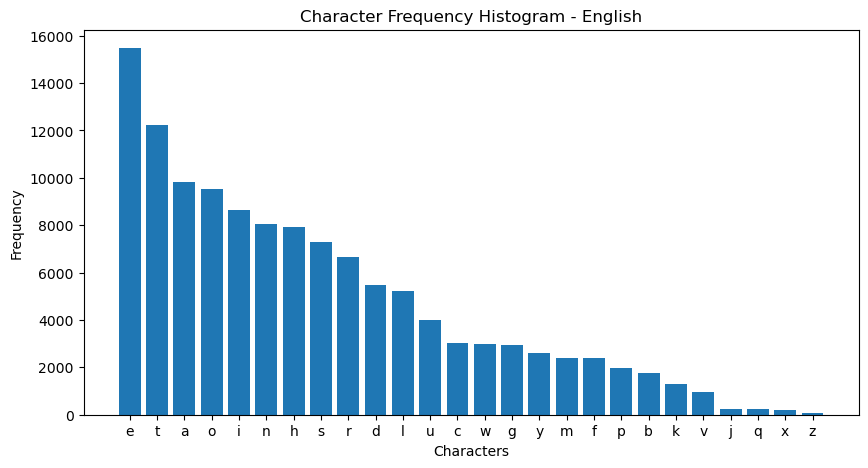

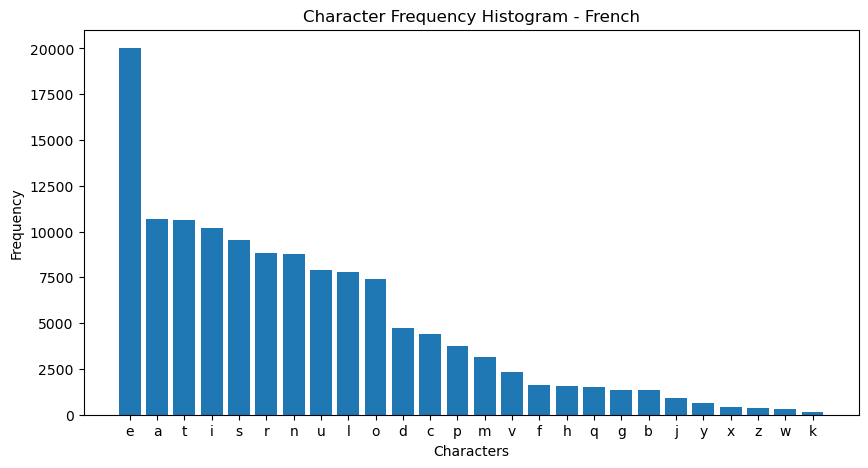

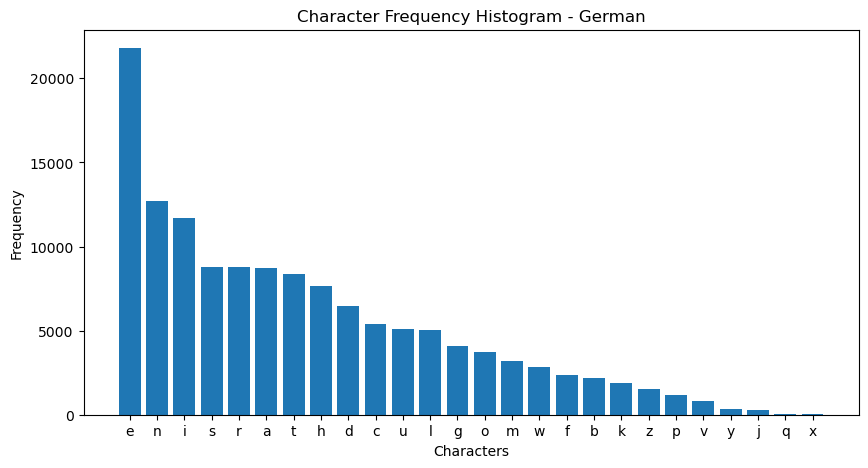

In [9]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_histogram(text, language):
    counter = Counter(text.replace(' ', ''))
    frequencies = sorted(counter.items(), key=lambda x: x[1], reverse=True)
    characters, counts = zip(*frequencies)

    plt.figure(figsize=(10, 5))
    plt.bar(characters, counts)
    plt.title(f'Character Frequency Histogram - {language}')
    plt.xlabel('Characters')
    plt.ylabel('Frequency')
    plt.show()

plot_histogram(alice_eng, "English")
plot_histogram(alice_fra, "French")
plot_histogram(alice_ger, "German")


In [12]:
import numpy as np

def kullback_leibler_divergence(p, q):
    p = np.array(p) + 1e-15  # Adding a small number to avoid log(0)
    q = np.array(q) + 1e-15  # Adding a small number to avoid division by zero
    return np.sum(p * np.log(p / q))

def rotate_text(text, shift):
    shifted_text = []
    for char in text:
        if 'a' <= char <= 'z':
            shifted_char = chr((ord(char) - ord('a') + shift) % 26 + ord('a'))
            shifted_text.append(shifted_char)
        else:
            shifted_text.append(char)
    return ''.join(shifted_text)

def find_best_shift(encrypted_text, reference_text):
    reference_counter = Counter(reference_text.replace(' ', ''))
    total_ref_chars = sum(reference_counter.values())
    reference_distribution = [reference_counter.get(chr(i), 0) / total_ref_chars for i in range(ord('a'), ord('z') + 1)]
    
    min_kl_div = float('inf')
    best_shift = None
    
    for shift in range(26):
        shifted_text = rotate_text(encrypted_text, shift)
        shifted_counter = Counter(shifted_text.replace(' ', ''))
        total_shifted_chars = sum(shifted_counter.values())
        shifted_distribution = [shifted_counter.get(chr(i), 0) / total_shifted_chars for i in range(ord('a'), ord('z') + 1)]
        
        kl_div = kullback_leibler_divergence(shifted_distribution, reference_distribution)
        if kl_div < min_kl_div:
            min_kl_div = kl_div
            best_shift = shift
    
    return best_shift, min_kl_div

encrypted_text = "ul tyrdgzxefe uzk cr tyvezccv tfddv jz rcztv rmrzk gric? kflk yrlkvk le dfdvek rgi?j cr tyvezccv rmrzk uzjgrilrcztv tfekvdgcr cv tyrdgzxefe ule rzi gvejzw gveurek le zejkrek vjjrprek uv uvmzevi hlvcj ve ?krzvek cvj t?k?j vk tfddv cv tyrdgzxefe?krzk kflk ifeu vccv kiflmr cr hlvjkzfe wfik vdsriirjjrekv vewze vccv?kveuzk jvj sirj kflk rlkfli ve cvj rccfexvrek rlkrek hlv gfjjzscvvk uv tyrhlv drze vecvmr lev gvkzkv grikzv ul sfiu ul tyrdgzxefe drzekverek cvhlvc uvj uvlo jv uzkvccv vk vccv xizxefkr le gvl ul dfitvrl uv cr drze uifzkv gfli mfzi hlvc vwwvk zc gifulzirzk givjhlv rljjzk?k vccv iv?lk le tflg mzfcvek jflj cv dvekfe zc mverzk uv wirggvi tfekiv jfe gzvu tv siljhlv tyrexvdvek clz wzk xireu gvli drzj vccv tfdgizk hlzc ep rmrzk grj uv kvdgj ? gviuiv tri vccv uzdzelrzk irgzuvdvek vccv jv dzk ufet szve mzkv ? drexvi le gvl uv crlkiv dfitvrl jfe dvekfe ?krzk jz irggifty? uv jfe gzvu hlzc p rmrzk ? gvzev rjjvq uv gcrtv gfli hlvccv g?k flmizi cr sfltyv vccv p i?ljjzk vewze vk grimzek ? rmrcvi lev grikzv ul dfitvrl uv cr drze xrltyv"

shift_eng, kl_div_eng = find_best_shift(encrypted_text, alice_eng)
shift_fra, kl_div_fra = find_best_shift(encrypted_text, alice_fra)
shift_ger, kl_div_ger = find_best_shift(encrypted_text, alice_ger)

print(f"English: Shift={shift_eng}, KL Div={kl_div_eng}")
print(f"French: Shift={shift_fra}, KL Div={kl_div_fra}")
print(f"German: Shift={shift_ger}, KL Div={kl_div_ger}")


English: Shift=9, KL Div=0.13213453086006594
French: Shift=9, KL Div=0.008812450101640956
German: Shift=9, KL Div=0.1782216778656368


French shows the lowest KL divergence suggesting that after applying a shift of 9, the distribution resembles the natural frequency distribution of French. Text is in french and this is what it is decoded:



In [14]:
encrypted_text = "ul tyrdgzxefe uzk cr tyvezccv tfddv jz rcztv rmrzk gric? kflk yrlkvk le dfdvek rgi?j cr tyvezccv rmrzk uzjgrilrcztv tfekvdgcr cv tyrdgzxefe ule rzi gvejzw gveurek le zejkrek vjjrprek uv uvmzevi hlvcj ve ?krzvek cvj t?k?j vk tfddv cv tyrdgzxefe?krzk kflk ifeu vccv kiflmr cr hlvjkzfe wfik vdsriirjjrekv vewze vccv?kveuzk jvj sirj kflk rlkfli ve cvj rccfexvrek rlkrek hlv gfjjzscvvk uv tyrhlv drze vecvmr lev gvkzkv grikzv ul sfiu ul tyrdgzxefe drzekverek cvhlvc uvj uvlo jv uzkvccv vk vccv xizxefkr le gvl ul dfitvrl uv cr drze uifzkv gfli mfzi hlvc vwwvk zc gifulzirzk givjhlv rljjzk?k vccv iv?lk le tflg mzfcvek jflj cv dvekfe zc mverzk uv wirggvi tfekiv jfe gzvu tv siljhlv tyrexvdvek clz wzk xireu gvli drzj vccv tfdgizk hlzc ep rmrzk grj uv kvdgj ? gviuiv tri vccv uzdzelrzk irgzuvdvek vccv jv dzk ufet szve mzkv ? drexvi le gvl uv crlkiv dfitvrl jfe dvekfe ?krzk jz irggifty? uv jfe gzvu hlzc p rmrzk ? gvzev rjjvq uv gcrtv gfli hlvccv g?k flmizi cr sfltyv vccv p i?ljjzk vewze vk grimzek ? rmrcvi lev grikzv ul dfitvrl uv cr drze xrltyv"

def decrypt_caesar_cipher(text, shift):
    decrypted_text = []
    for char in text:
        if char.isalpha():
            offset = ord('a') if char.islower() else ord('A')
            decrypted_char = chr((ord(char) - offset - shift) % 26 + offset)
            decrypted_text.append(decrypted_char)
        else:
            decrypted_text.append(char)
    return ''.join(decrypted_text)

decrypted_text_17 = decrypt_caesar_cipher(encrypted_text, 17)
print("Decrypted with shift 17:", decrypted_text_17)

decrypted_text_9 = decrypt_caesar_cipher(encrypted_text, 9)
print("Decrypted with shift 9:", decrypted_text_9)


Decrypted with shift 17: du champignon dit la chenille comme si alice avait parl? tout hautet un moment apr?s la chenille avait disparualice contempla le champignon dun air pensif pendant un instant essayant de deviner quels en ?taient les c?t?s et comme le champignon?tait tout rond elle trouva la question fort embarrassante enfin elle?tendit ses bras tout autour en les allongeant autant que possibleet de chaque main enleva une petite partie du bord du champignon maintenant lequel des deux se ditelle et elle grignota un peu du morceau de la main droite pour voir quel effet il produirait presque aussit?t elle re?ut un coup violent sous le menton il venait de frapper contre son pied ce brusque changement lui fit grand peur mais elle comprit quil ny avait pas de temps ? perdre car elle diminuait rapidement elle se mit donc bien vite ? manger un peu de lautre morceau son menton ?tait si rapproch? de son pied quil y avait ? peine assez de place pour quelle p?t ouvrir la bouche elle y r?ussi

However, since Caesar cipher is symmetric, the shift applied to reverse direction showed the true text. So the KL-divergence showed us that text is french, but got wrong with the shift, but after applying it to a reverse direction we finally got it right.